In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import numpy as np
import healpy as hp
from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt

from utils import downgrade_mask

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
path_mask = '/n17data/mkilbing/astro/data/CFIS/v1.0/Lensfit/masks/CFIS3500_THELI_mask_hp_4096.fits'

mask = hp.read_map(path_mask, verbose=True)
mask[mask>0] = 2
mask[mask==0] = 1
mask[mask==2] = 0
print(f"Area: {np.sum(mask)*hp.nside2pixarea(4096, degrees=True)} deg^2")
mask = downgrade_mask(mask, 2048, verbose=True, threshold=0.51)
print(f"Area: {np.sum(mask)*hp.nside2pixarea(2048, degrees=True)} deg^2")
mask = downgrade_mask(mask, 1024, verbose=True, threshold=0.51)
print(f"Area: {np.sum(mask)*hp.nside2pixarea(1024, degrees=True)} deg^2")
mask = downgrade_mask(mask, 512, verbose=True, threshold=0.51)
print(f"Area: {np.sum(mask)*hp.nside2pixarea(512, degrees=True)} deg^2")

/tmp/ipykernel_332657/2782961925.py:3: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  mask = hp.read_map(path_mask, verbose=True)


Area: 2137.792178134421 deg^2
[!] Downgrading mask from nside=4096 to nside=2048...
[!] Done.
Area: 2137.087507517751 deg^2
[!] Downgrading mask from nside=2048 to nside=1024...
[!] Done.
Area: 2088.234716083018 deg^2
[!] Downgrading mask from nside=1024 to nside=512...
[!] Done.
Area: 1960.694866918937 deg^2


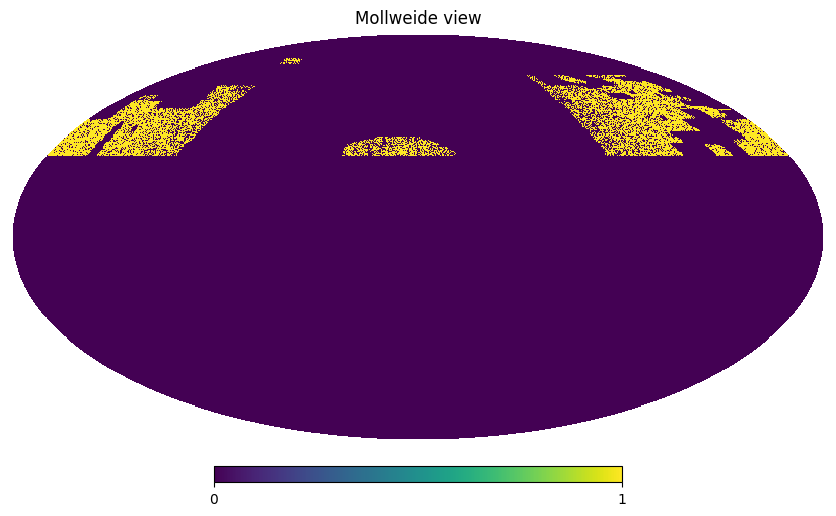

In [4]:
hp.mollview(mask)
plt.show()

In [5]:
nside = 512
npix = hp.nside2npix(nside)

rot = hp.rotator.Rotator(deg=True, rot=[0, 0, 180])

In [6]:
footprint_pix = np.where(mask > 0)[0]

theta, phi = hp.pix2ang(nside, footprint_pix)

theta_rot, phi_rot = rot(theta, phi)

rotated_pix = hp.ang2pix(nside, theta_rot, phi_rot)

rotated_mask = np.zeros(npix)
rotated_mask[rotated_pix] = 2

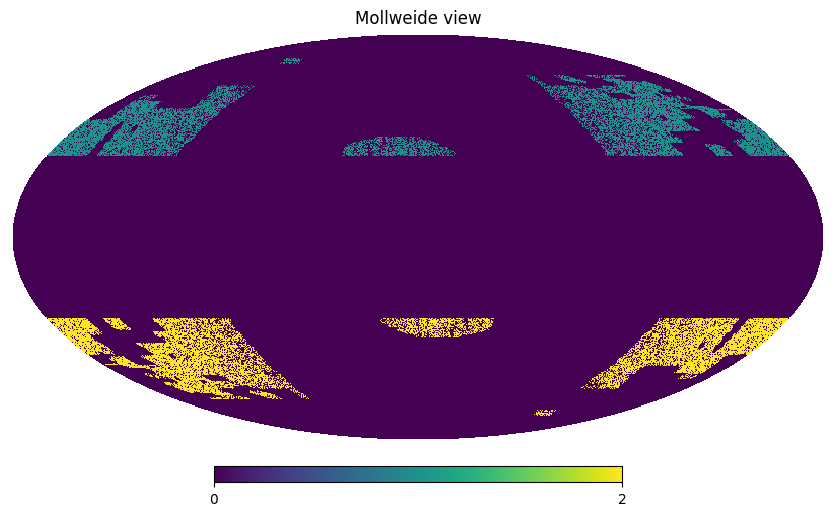

In [7]:
hp.mollview(rotated_mask+mask)
plt.show()

In [8]:
def find_footprint(mask, nside):
    npix = hp.nside2npix(nside)
    is_overlap = False
    i=1
    while not is_overlap:
        print(f"Step {i}")

        angles = np.random.rand(3)*360
        rot = hp.rotator.Rotator(deg=True, rot=angles)

        footprint_pix = np.where(mask == 1)[0]

        theta, phi = hp.pix2ang(nside, footprint_pix)

        theta_rot, phi_rot = rot(theta, phi)

        rotated_pix = hp.ang2pix(nside, theta_rot, phi_rot)

        rotated_mask = np.zeros(npix)
        rotated_mask[rotated_pix] = np.max(mask)+1

        add_mask = mask + rotated_mask
        if np.max(add_mask) == np.max(mask)+1:
            is_overlap = True
            print(angles)
        elif i > 10000:
            print("No overlap found")
            break
        i+=1
    return angles

In [11]:
angles = find_footprint(mask+rotated_mask, nside)

Step 1
Step 2
Step 3
Step 4
Step 5


Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
[47.55523053 59.8905171  48.64763016]


In [12]:
rot_2 = hp.rotator.Rotator(deg=True, rot=angles)

theta_rot_2, phi_rot_2 = rot_2(theta, phi)

rotated_pix_2 = hp.ang2pix(nside, theta_rot_2, phi_rot_2)

rotated_mask_2 = np.zeros(npix)
rotated_mask_2[rotated_pix_2] = 3

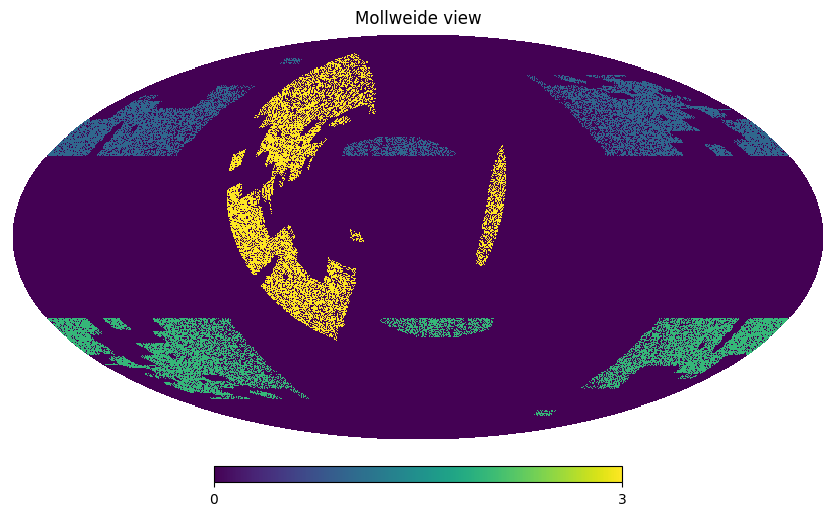

In [13]:
hp.mollview(rotated_mask+mask+rotated_mask_2)
plt.show()

In [16]:
angles = find_footprint(mask+rotated_mask+rotated_mask_2, 512)

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6


Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 121
Step 122
Step 123
Step 124
Step 125
Step 126
Step 127
Step 12

In [17]:
rot_3 = hp.rotator.Rotator(deg=True, rot=angles)

theta_rot_3, phi_rot_3 = rot_3(theta, phi)

rotated_pix_3 = hp.ang2pix(nside, theta_rot_3, phi_rot_3)

rotated_mask_3 = np.zeros(npix)
rotated_mask_3[rotated_pix_3] = 4

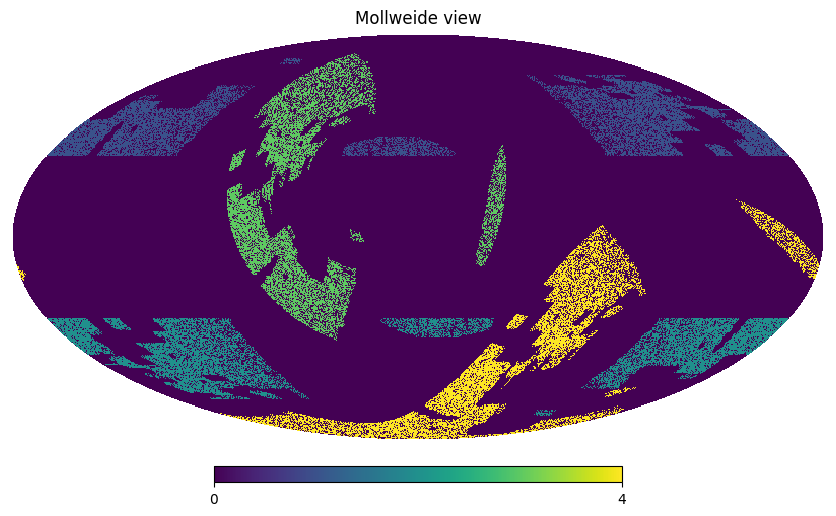

In [18]:
hp.mollview(rotated_mask+mask+rotated_mask_2+rotated_mask_3)
plt.show()

In [19]:
angles = find_footprint(mask+rotated_mask+rotated_mask_2+rotated_mask_3, 512)

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9
Step 10
Step 11
Step 12
Step 13
Step 14
Step 15
Step 16
Step 17
Step 18
Step 19
Step 20
Step 21
Step 22
Step 23
Step 24
Step 25
Step 26
Step 27
Step 28
Step 29
Step 30
Step 31
Step 32
Step 33
Step 34
Step 35
Step 36
Step 37
Step 38
Step 39
Step 40
Step 41
Step 42
Step 43
Step 44
Step 45
Step 46
Step 47
Step 48
Step 49
Step 50
Step 51
Step 52
Step 53
Step 54
Step 55
Step 56
Step 57
Step 58
Step 59
Step 60
Step 61
Step 62
Step 63
Step 64
Step 65
Step 66
Step 67
Step 68
Step 69
Step 70
Step 71
Step 72
Step 73
Step 74
Step 75
Step 76
Step 77
Step 78
Step 79
Step 80
Step 81
Step 82
Step 83
Step 84
Step 85
Step 86
Step 87
Step 88
Step 89
Step 90
Step 91
Step 92
Step 93
Step 94
Step 95
Step 96
Step 97
Step 98
Step 99
Step 100
Step 101
Step 102
Step 103
Step 104
Step 105
Step 106
Step 107
Step 108
Step 109
Step 110
Step 111
Step 112
Step 113
Step 114
Step 115
Step 116
Step 117
Step 118
Step 119
Step 120
Step 121
Step 122
Step 123
S

## Pierre approach

In [8]:
path_gal = '/n17data/mkilbing/astro/data/CFIS/v1.0/ShapePipe/unions_shapepipe_2022_v1.4.0.fits'
cat_gal = fits.getdata(path_gal)

nside = 512

In [10]:
theta = (90-cat_gal['dec'])*np.pi/180
phi = cat_gal['ra']*np.pi/180

pix = hp.ang2pix(512, theta, phi)

unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)

n_gal = np.zeros(hp.nside2npix(nside))
n_gal[unique_pix] = np.bincount(idx_rep, weights=cat_gal['w'])

mask = n_gal!=0

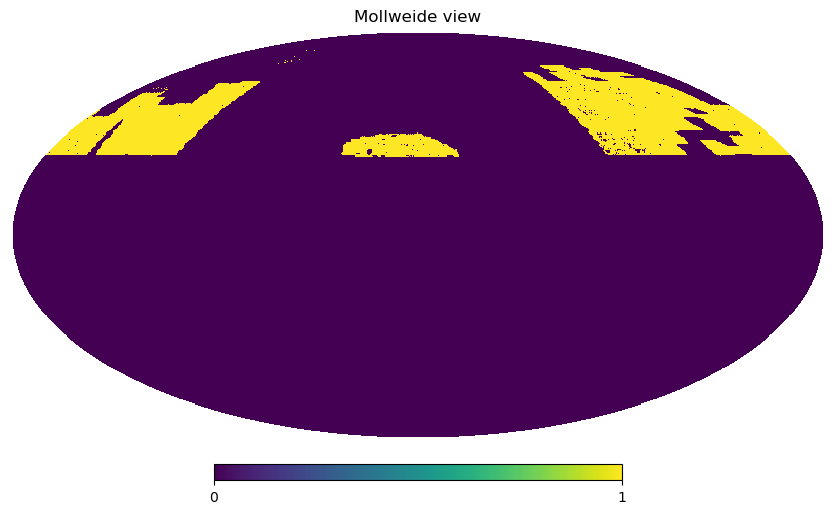

In [11]:
hp.mollview(mask)
plt.show()

In [15]:
def rotate_gals(ras, decs, gammas1, gammas2, rotangle_rad, rotangle_dec, inv=False, units="deg"):
    """ Rotates survey patch s.t. its center of mass lies in the origin. """
    
    # Map (ra, dec) --> (theta, phi)
    if units=="deg":
        decs_rad = decs * np.pi/180.
        ras_rad = ras * np.pi/180.
        rotangle_rad = rotangle_rad * np.pi/180.
        rotangle_dec = rotangle_dec * np.pi/180.
    thetas = np.pi/2. + decs_rad
    phis = ras_rad
    
    # Compute rotation angle
    thisrot = hp.Rotator(rot=[-rotangle_dec,rotangle_rad], deg=False, inv=inv)
    rotatedthetas, rotatedphis = thisrot(thetas,phis, inv=False)

    gamma_rot = (gammas1+1J*gammas2) * np.exp(1J * 2 * thisrot.angle_ref(rotatedthetas, rotatedphis,inv=True))
    
    # Transform back to (ra,dec)
    ra_rot = rotatedphis
    dec_rot = rotatedthetas - np.pi/2.
    if units=="deg":
        dec_rot *= 180./np.pi
        ra_rot *= 180./np.pi
    
    return ra_rot, dec_rot, gamma_rot.real, gamma_rot.imag

def load_sources(path):

    data = Table.read(path)
    
    rac = data['RA']
    dec = data['Dec']
    weight = data['w']
    e_1 = data['e1']
    e_2 = data['e2']

    gal_2_rot = (rac<50)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= -20, rotangle_dec= 0)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot

    gal_2_rot = (rac>300)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= -20, rotangle_dec= 0)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot

    gal_2_rot = (rac<50)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= 0, rotangle_dec= 50)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot

    gal_2_rot = (dec>20)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= 0, rotangle_dec= 5)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot

    gal_2_rot = (dec<20)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= -8.5, rotangle_dec= 0)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot

    gal_2_rot = (dec<20)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= 0, rotangle_dec= 5)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot
    
    gal_2_rot = (dec<20)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= -5, rotangle_dec= 0)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot
    
    gal_2_rot = (dec>65)&(rac>0)
    ra_rot,dec_rot,e_1_rot,e_2_rot = rotate_gals(ras=rac[gal_2_rot],decs=dec[gal_2_rot],gammas1=e_1[gal_2_rot], gammas2=e_2[gal_2_rot],rotangle_rad= 5, rotangle_dec= 0)
    dec[gal_2_rot] = dec_rot
    rac[gal_2_rot] = ra_rot
    e_1[gal_2_rot] = e_1_rot
    e_2[gal_2_rot] = e_2_rot
    
    
    return rac,dec,e_1,e_2,weight